In [1]:
import json
from tqdm import tqdm

In [2]:
with open(f"D:/Ultimate USA/Data Science/Data analytics/news articles/archive (5)/News_Category_Dataset_v3.json",'r', errors='ignore') as f:
    data = f.readlines()[:10000]

In [3]:
len(data)

10000

In [4]:
json_data = []
for i in tqdm(data):
    json_data.append(json.loads(i))
json_data[:5]

100%|██████████| 10000/10000 [00:00<00:00, 119048.14it/s]


[{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9',
  'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters',
  'category': 'U.S. NEWS',
  'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
  'authors': 'Carla K. Johnson, AP',
  'date': '2022-09-23'},
 {'link': 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe',
  'headline': 'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video',
  'category': 'U.S. NEWS',
  'short_description': "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
  'authors': 'Mary Papenfuss',
  'date': '2022-09-23'},
 {'link': 'https

In [5]:
categories = set()
for i in json_data:
    categories.add(i['category'])
len(categories)

29

In [6]:
categories

{'BLACK VOICES',
 'BUSINESS',
 'COMEDY',
 'CRIME',
 'CULTURE & ARTS',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'FOOD & DRINK',
 'HOME & LIVING',
 'IMPACT',
 'LATINO VOICES',
 'MEDIA',
 'MONEY',
 'PARENTING',
 'POLITICS',
 'QUEER VOICES',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'STYLE & BEAUTY',
 'TECH',
 'TRAVEL',
 'U.S. NEWS',
 'WEDDINGS',
 'WEIRD NEWS',
 'WELLNESS',
 'WOMEN',
 'WORLD NEWS'}

In [7]:
category_freq = {}
for i in json_data:

    if i['category'] not in category_freq.keys():
        category_freq[i['category']] = 1
    else:
        category_freq[i['category']] += 1
        
category_freq_list = list(category_freq.items())

In [8]:
category_freq_list.sort(key=lambda x: x[1], reverse=True)
category_freq_list

[('POLITICS', 3361),
 ('ENTERTAINMENT', 1597),
 ('U.S. NEWS', 1377),
 ('WORLD NEWS', 1194),
 ('COMEDY', 319),
 ('SPORTS', 209),
 ('CRIME', 193),
 ('STYLE & BEAUTY', 165),
 ('MEDIA', 163),
 ('WEIRD NEWS', 142),
 ('BLACK VOICES', 128),
 ('HOME & LIVING', 125),
 ('ENVIRONMENT', 121),
 ('WELLNESS', 118),
 ('PARENTING', 114),
 ('FOOD & DRINK', 114),
 ('WOMEN', 110),
 ('QUEER VOICES', 102),
 ('BUSINESS', 65),
 ('MONEY', 49),
 ('CULTURE & ARTS', 44),
 ('IMPACT', 41),
 ('TECH', 39),
 ('SCIENCE', 34),
 ('RELIGION', 33),
 ('TRAVEL', 24),
 ('EDUCATION', 12),
 ('LATINO VOICES', 5),
 ('WEDDINGS', 2)]

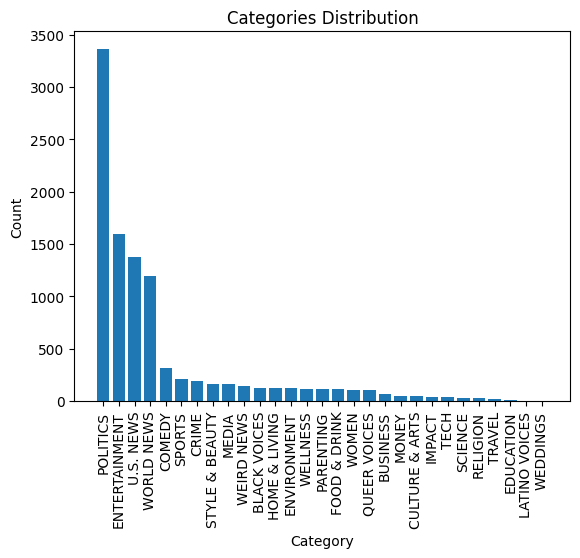

In [9]:
import matplotlib.pyplot as plt



# create a list of the keys and values
keys = [i[0] for i in category_freq_list][:]
values = [i[1] for i in category_freq_list][:]

# create a bar chart
plt.bar(keys, values)
plt.xticks(rotation=90)
# add a title and labels
plt.title('Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# display the plot
plt.show()


42 29


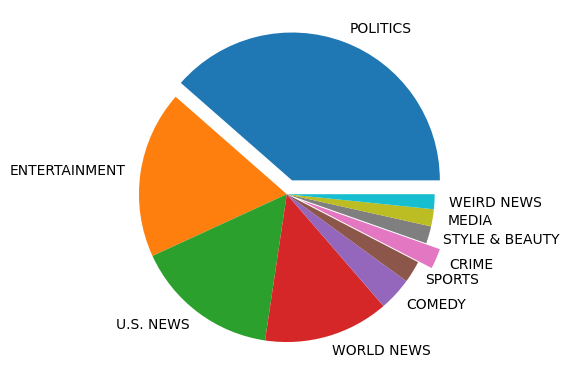

In [10]:
explode = (0.1, 0, 0, 0, 0, 0,  # First group of 7 categories
           0.1, 0, 0, 0, 0, 0,  # Second group of 7 categories
           0, 0.1, 0, 0, 0, 0,  # Third group of 7 categories
           0, 0, 0.1, 0, 0, 0,  # Fourth group of 7 categories
           0, 0, 0, 0.1, 0, 0,  # Fifth group of 7 categories
           0, 0, 0, 0, 0.1, 0,
          0, 0, 0, 0, 0, 0.1)  # Sixth group of 7 categories

print(len(explode), len(values))
plt.pie(x=values[:10], labels=keys[:10], explode=explode[:10])

plt.show()

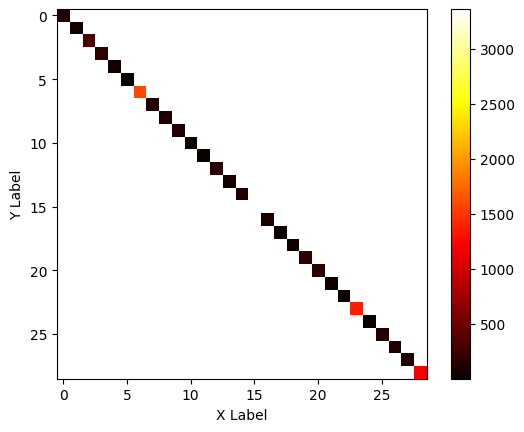

In [11]:
import pandas as pd


# Convert the frequency dictionary to a pandas dataframe
df = pd.DataFrame(list(category_freq.items()), columns=['Category', 'Value'])

# Reshape the dataframe into a 2D matrix
heatmap_data = pd.pivot_table(df, values='Value', index=['Category'], columns=['Category'])

# Create the heatmap using the imshow() function
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')

# Add a colorbar to show the legend for the heatmap
plt.colorbar()

# Add axis labels
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Show the plot
plt.show()


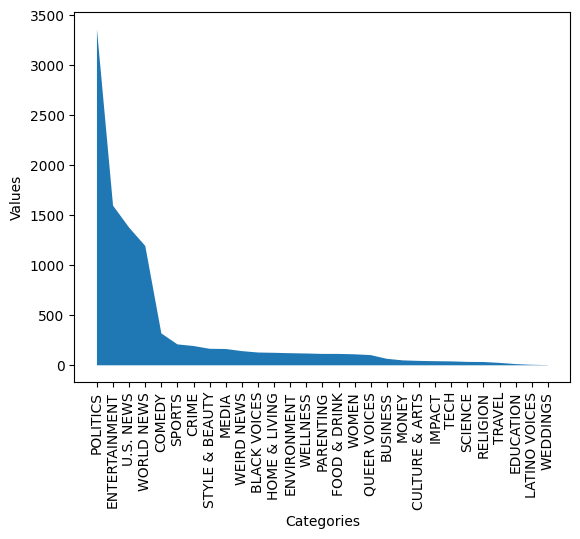

In [12]:
import matplotlib.pyplot as plt

# Create the area chart using the fill_between() function
plt.fill_between(keys, values)
plt.xticks(rotation=90)
# Add axis labels
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()


In [13]:
import pandas as pd
df = pd.DataFrame.from_dict(json_data)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [14]:
grouped_by = df.groupby('category')
date_data = []
for i in grouped_by:
    date_data.append((i[0], i[1]['date']))

In [15]:
date_data[0][1].value_counts()

date
2018-05-09    6
2018-05-21    5
2018-05-04    5
2018-05-23    5
2018-05-22    5
             ..
2018-11-23    1
2018-11-14    1
2018-11-13    1
2018-11-04    1
2019-02-01    1
Name: count, Length: 73, dtype: int64

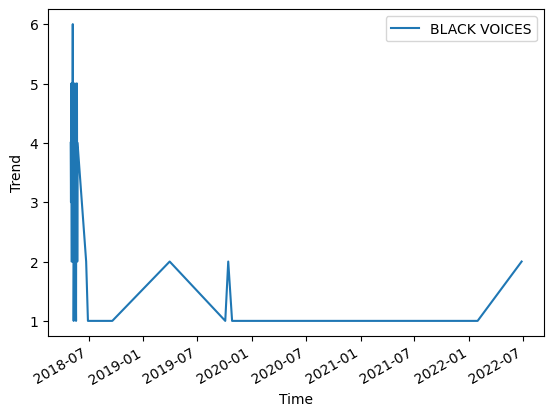

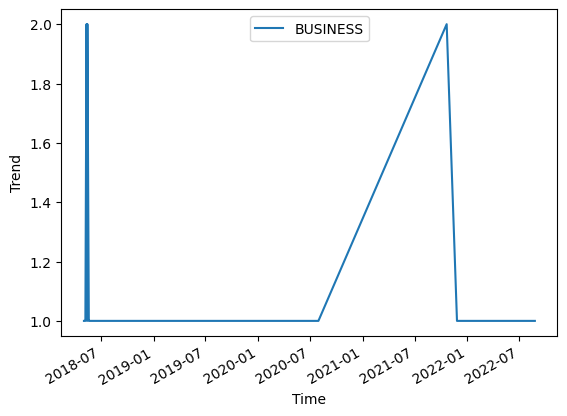

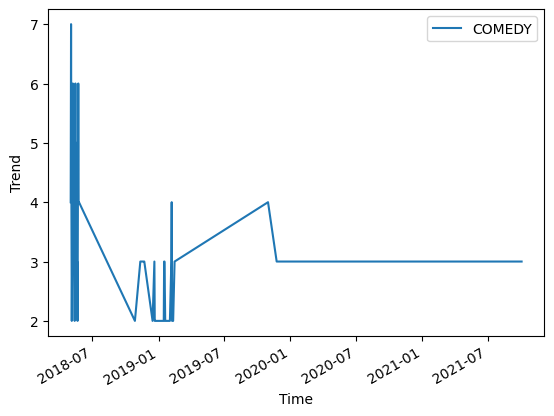

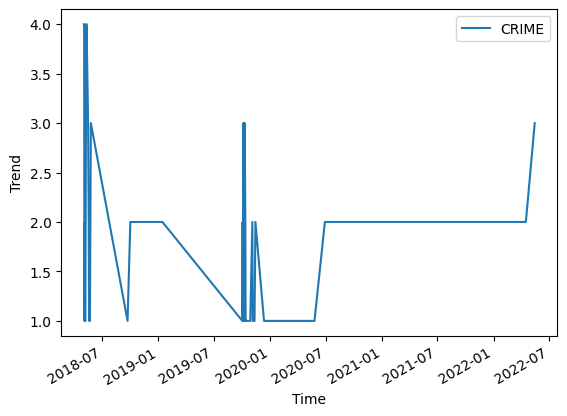

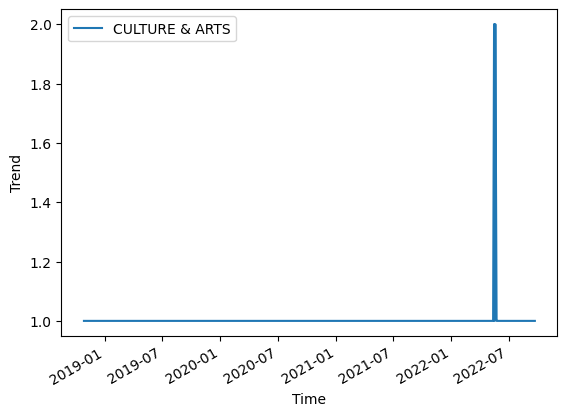

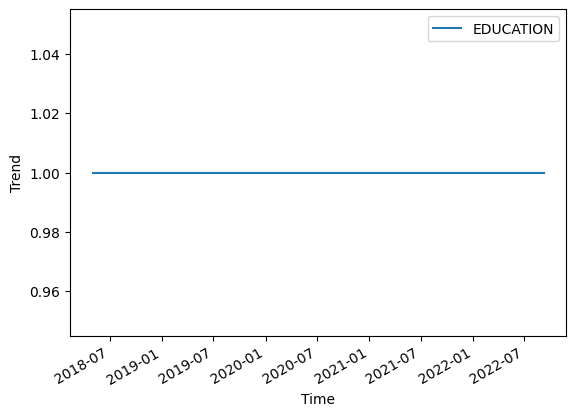

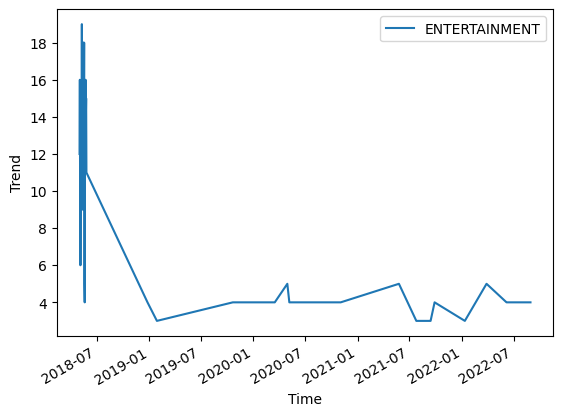

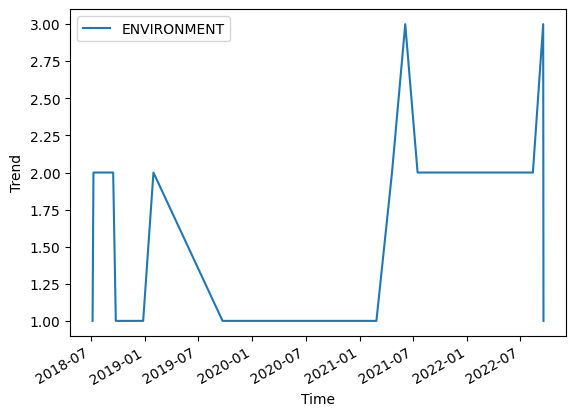

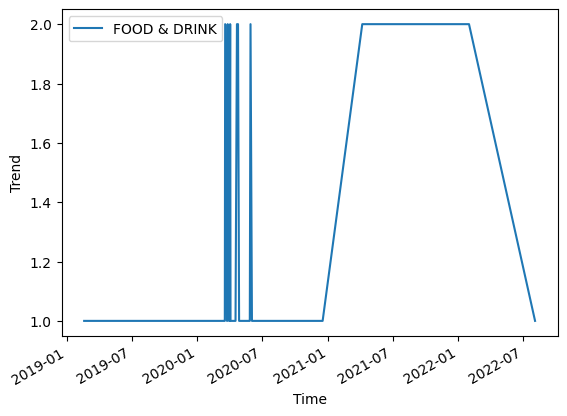

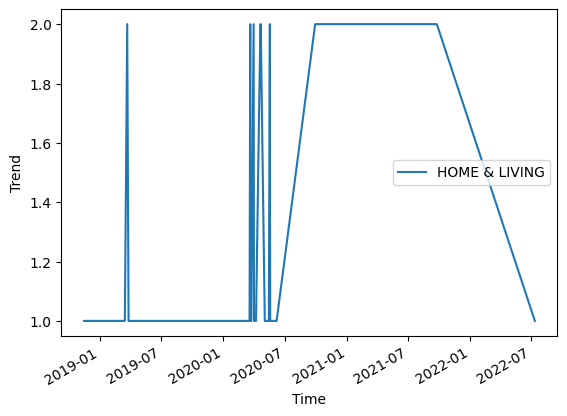

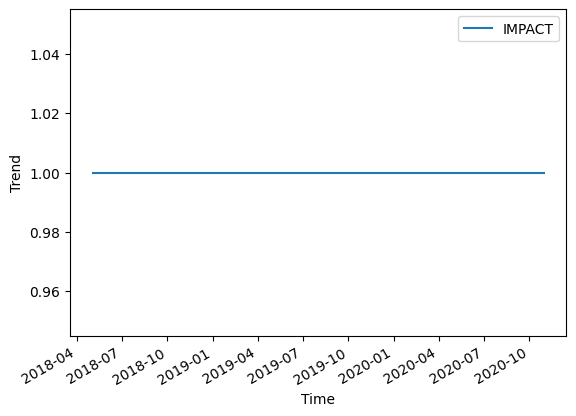

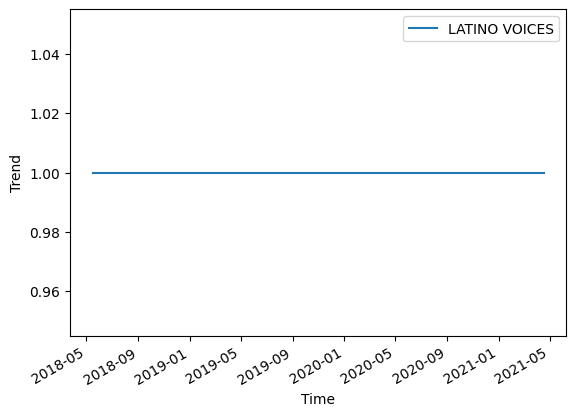

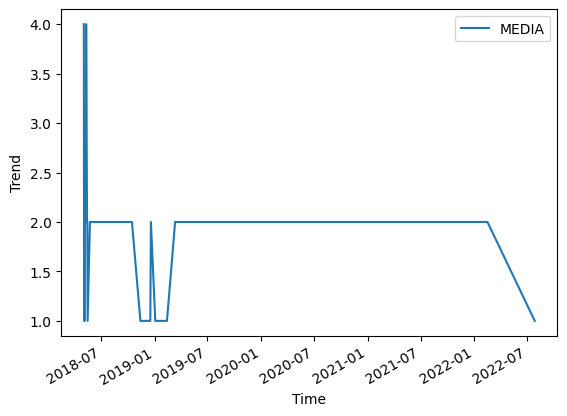

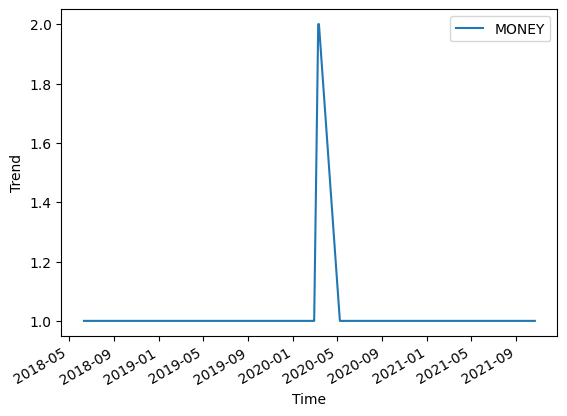

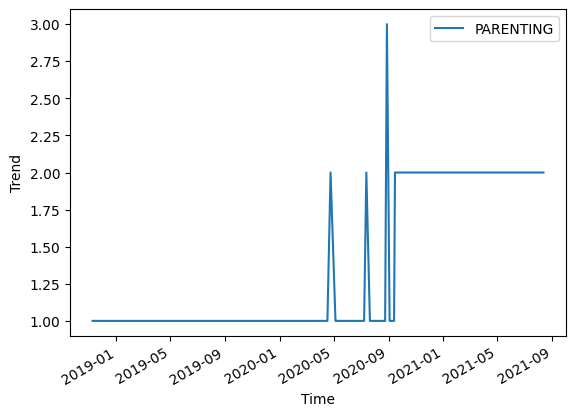

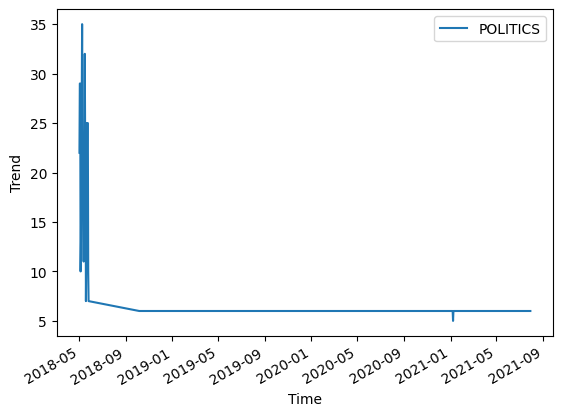

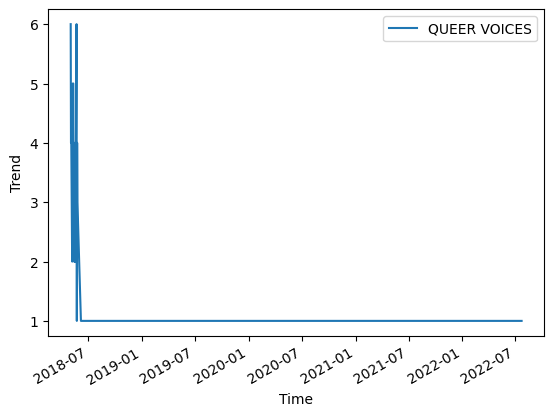

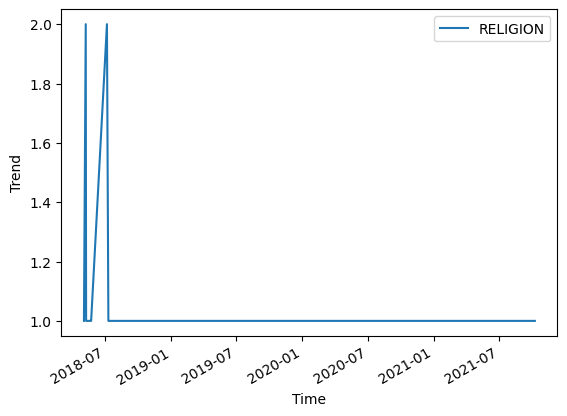

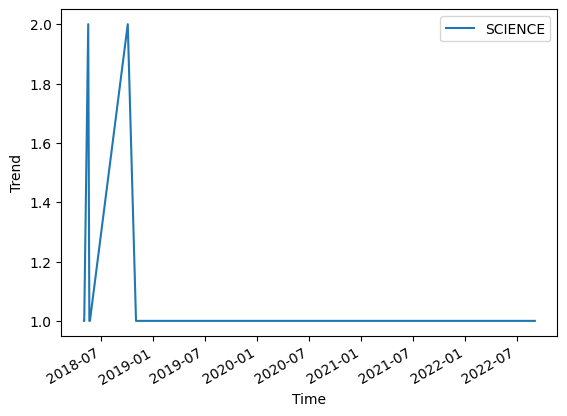

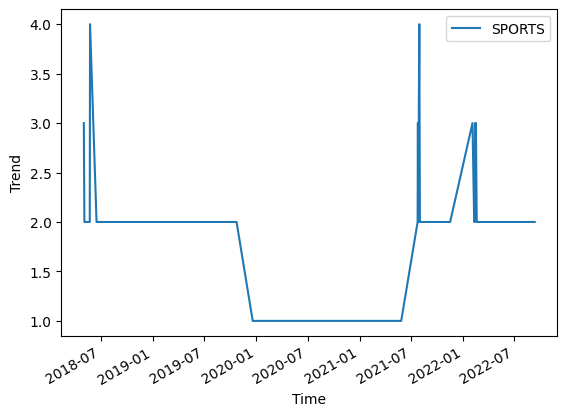

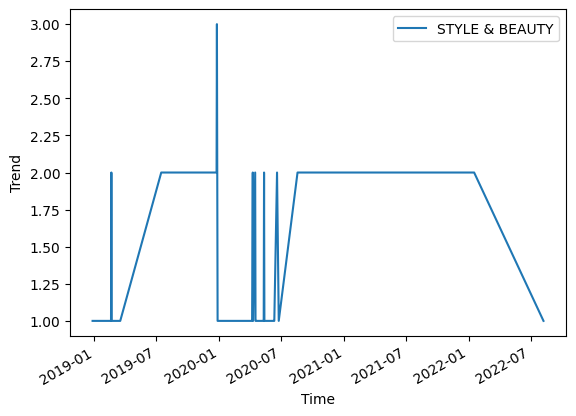

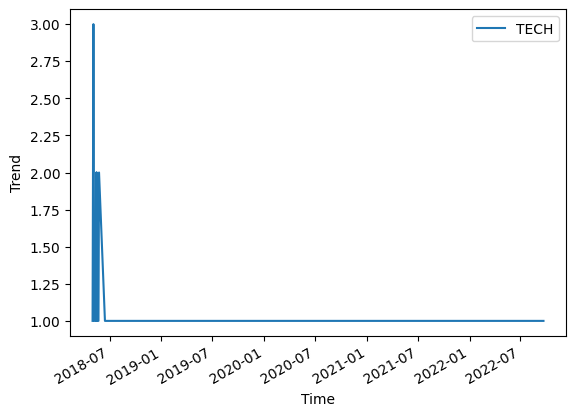

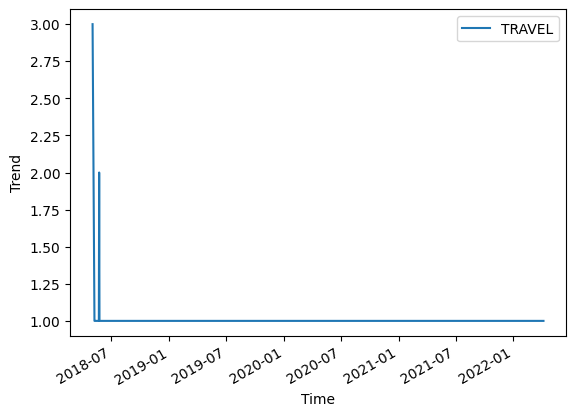

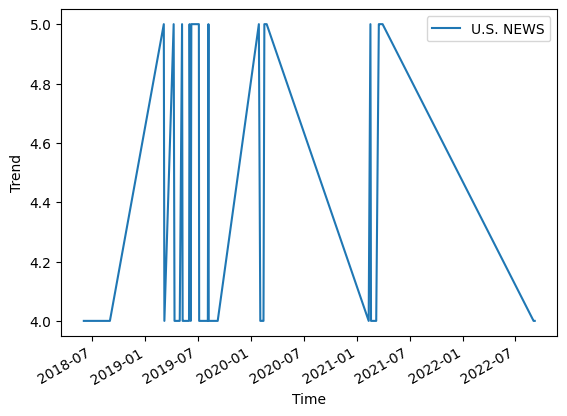

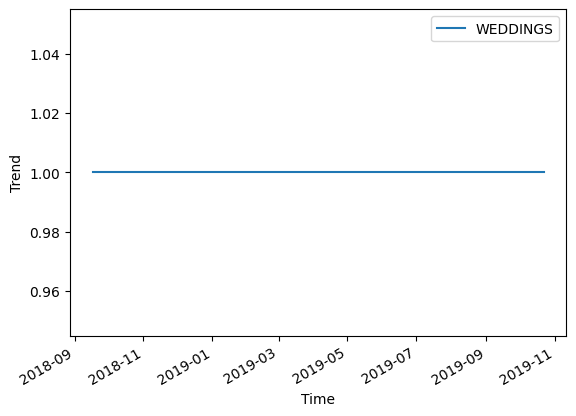

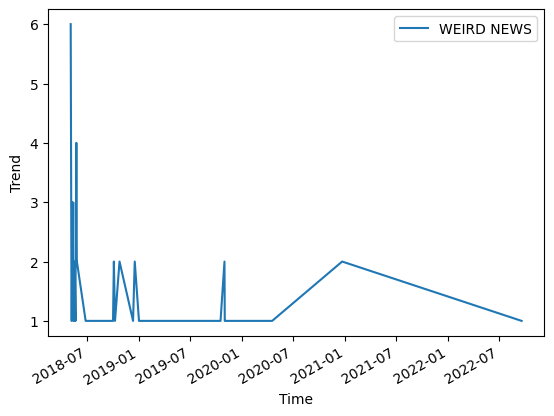

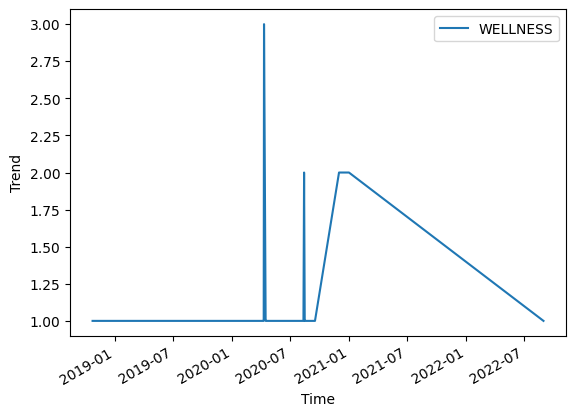

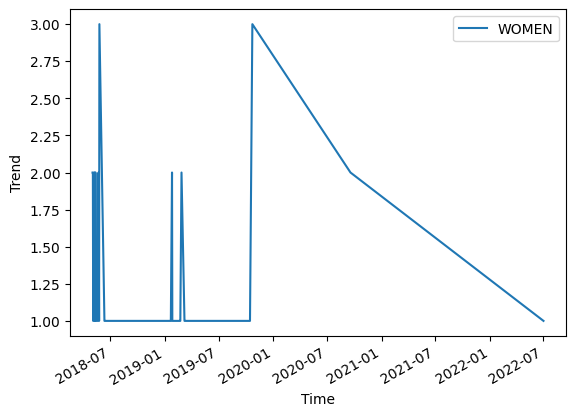

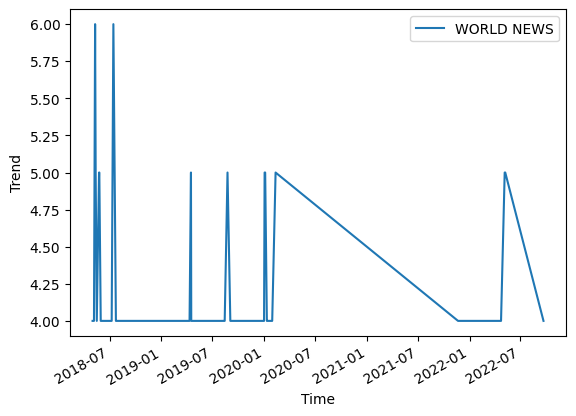

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

date_date_formatted = []
for i in date_data:
    date_date_formatted.append(i[1])
    
for i in date_data:
    data = {'time': i[1].value_counts().index[:50],
            f'{i[0]}': i[1].value_counts().values[:50]}
    df = pd.DataFrame(data)

    # Convert the time column to datetime format
    df['time'] = pd.to_datetime(df['time'])

    # Set the time column as the index
    df.set_index('time', inplace=True)

    # Create the line chart using the plot() function
    df.plot(kind='line')

    # Add axis labels
    plt.xlabel('Time')
    plt.ylabel('Trend')

    # Show the plot
    plt.show()


In [17]:
data_df = pd.DataFrame.from_dict(json_data)
data_df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [18]:
data_df.tail()

,link,headline,category,short_description,authors,date
9995,https://www.huffingtonpost.com/entry/cdc-direc...,CDC Director Requests Salary Cut After Scrutin...,POLITICS,"Dr. Robert Redfield, who was hired in March, w...",Nina Golgowski,2018-05-01
9996,https://www.huffingtonpost.com/entry/kevin-nic...,Super PAC Screw-Up: Ad Favorably Compares GOP ...,POLITICS,The ad was supposed to help Wisconsin GOP Sena...,Amanda Terkel,2018-05-01
9997,https://www.huffingtonpost.com/entry/ant-man-a...,'Ant-Man And The Wasp' Trailer Brings The Fun ...,ENTERTAINMENT,We're still stressed out.,Cole Delbyck,2018-05-01
9998,https://www.huffingtonpost.com/entry/michelle-...,Here's What You Missed While The Internet Was ...,POLITICS,"Among other happenings, the first fast-food un...",Amanda Terkel,2018-05-01
9999,https://www.huffingtonpost.com/entry/facebook-...,Facebook Will Let Users See Which Sites Are Tr...,TECH,You'll be able to stop Facebook from linking b...,"David Lumb, Engadget",2018-05-01


In [19]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    """
    Cleans the input text by performing the following operations:
    - Converts text to lowercase
    - Removes URLs
    - Removes HTML tags
    - Removes punctuation
    - Removes stop words
    - Tokenizes text
    
    Args:
    text (str): Input text to be cleaned
    
    Returns:
    list: List of cleaned tokens
    """
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?:\/\/[^\s]*', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words and tokenize text
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(filtered_tokens)
data_df['headline'] = data_df['headline'].apply(clean_text)
data_df['headline'] = data_df['short_description'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
headline = ' '.join(data_df['headline'].tolist())
short_desc = ' '.join(data_df['short_description'].tolist())

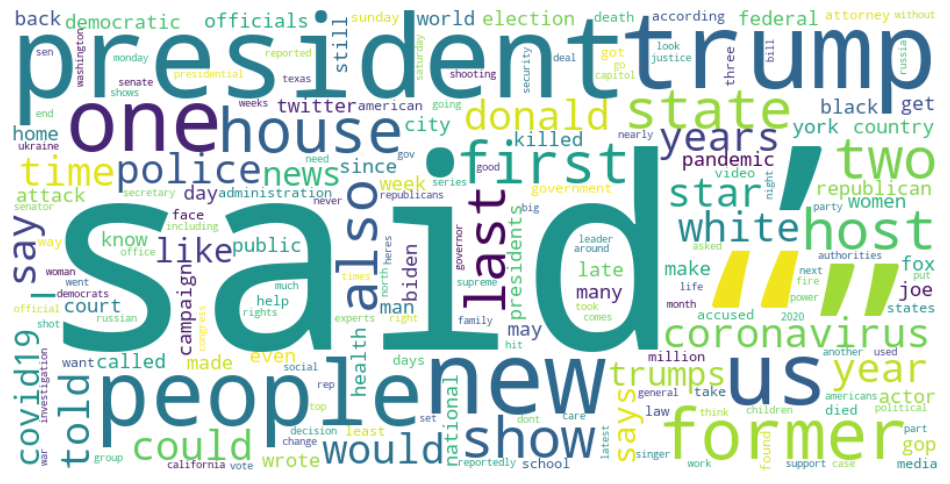

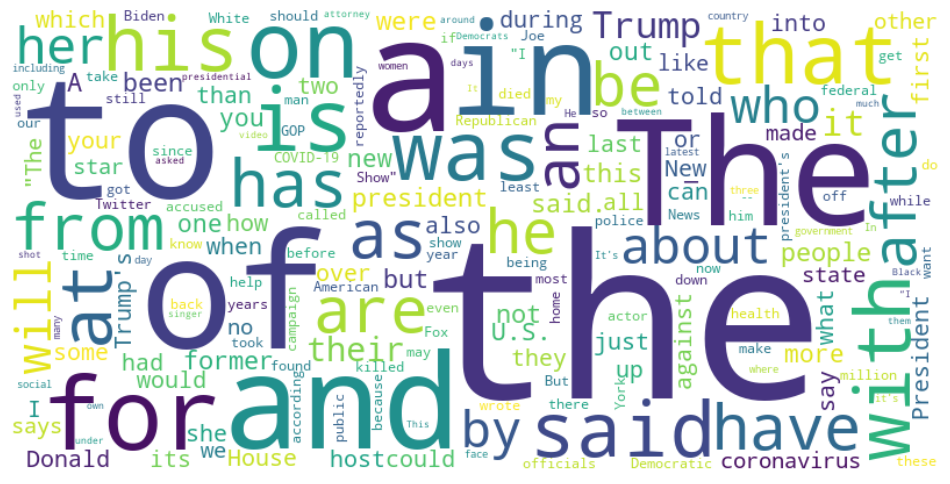

In [21]:
from collections import Counter
from wordcloud import WordCloud


headline_words = headline.split()
short_desc_words = short_desc.split()

# Create a frequency map of the words
headline_map = Counter(headline_words)
short_desc_map = Counter(short_desc_words)



# Create a word cloud from the frequency map
headline_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(headline_map)
short_desc_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(short_desc_map)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(headline_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(short_desc_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


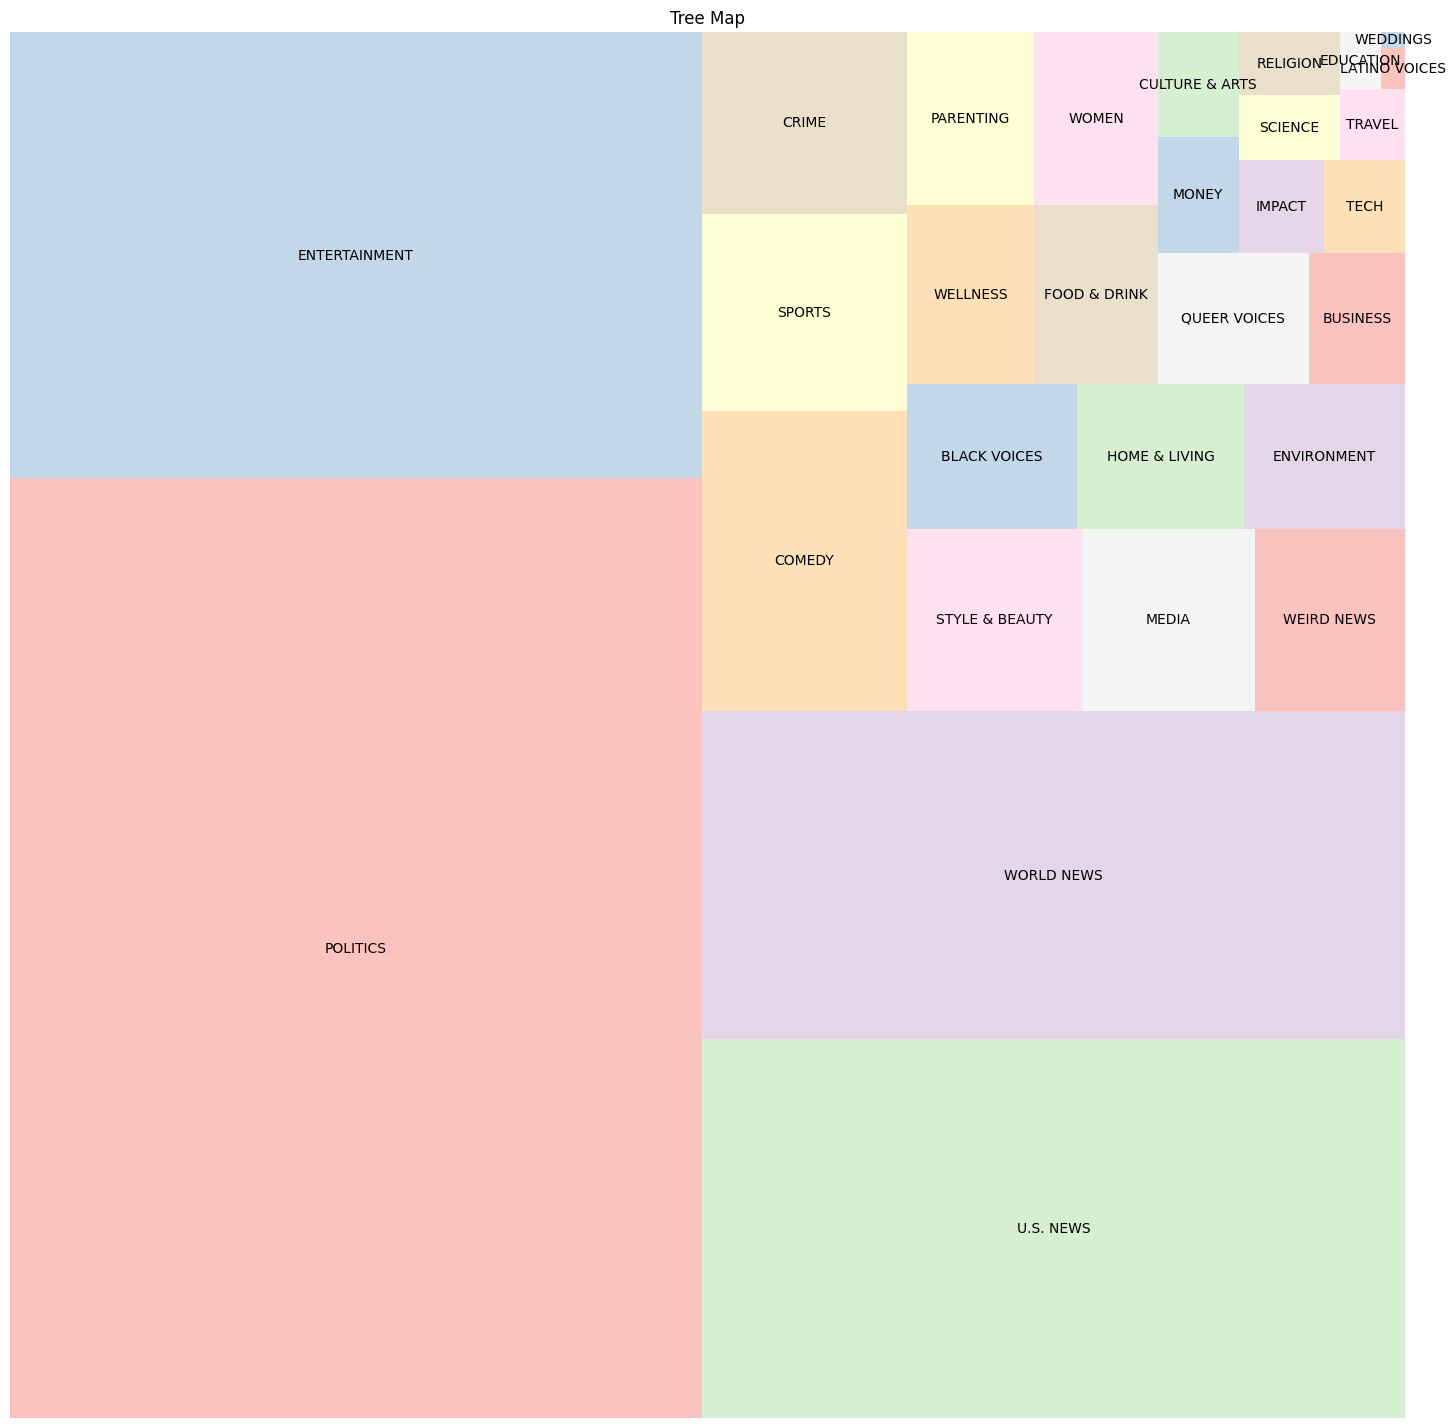

In [22]:
import matplotlib.pyplot as plt
import squarify

values = [i[1] for i in category_freq_list]
labels = [i[0] for i in category_freq_list]
cmap = plt.get_cmap('Pastel1')
plt.figure(figsize=(18, 18))
squarify.plot(sizes=values, label=labels, color=cmap.colors, alpha=.8)
plt.title("Tree Map")
plt.axis('off')
plt.show()


In [23]:
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Step 1: Data Preprocessing
# Here, we assume that the preprocessed corpus is stored in a list of documents called "documents"
data_df['documents'] = data_df['headline'] + " " + data_df['short_description']
# Step 2: Build a Vocabulary
tokens = []
for i in tqdm(data_df['documents'].values):
    t = []
    for j in i.split():
        t.append(j)
    tokens.append(t)
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

# # Step 4: Train the LDA Model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=20)



100%|██████████| 10000/10000 [00:00<00:00, 124933.84it/s]


In [24]:
# # Step 5: Interpret the Topics
for topic in ldamodel.print_topics(num_topics=10, num_words=5):
    print(topic)



(12, '0.040*"the" + 0.025*"The" + 0.024*"a" + 0.023*"of" + 0.015*"host"')
(13, '0.024*"court" + 0.018*"decision" + 0.017*"justice" + 0.013*"nominee" + 0.010*"conservative"')
(1, '0.019*"never" + 0.010*"lead" + 0.009*"activist" + 0.009*"suspect" + 0.009*"6"')
(14, '0.041*"the" + 0.035*"to" + 0.017*"a" + 0.013*"of" + 0.013*"and"')
(7, '0.020*"in" + 0.017*"the" + 0.010*"a" + 0.009*"The" + 0.009*"of"')
(0, '0.050*"the" + 0.032*"president" + 0.024*"The" + 0.022*"to" + 0.018*"of"')
(4, '0.030*"the" + 0.026*"people" + 0.020*"in" + 0.019*"of" + 0.017*"a"')
(9, '0.044*"the" + 0.031*"to" + 0.021*"and" + 0.017*"coronavirus" + 0.016*"of"')
(6, '0.035*"said" + 0.034*"the" + 0.027*"“" + 0.025*"to" + 0.022*"”"')
(3, '0.032*"two" + 0.015*"the" + 0.012*"in" + 0.012*"support" + 0.011*"fire"')


In [25]:

# # Step 6: Infer Topics
new_doc = "president of united states is good"
new_doc_bow = dictionary.doc2bow(new_doc.split())
topic_distribution = ldamodel.get_document_topics(new_doc_bow)

top_topics = sorted(topic_distribution, key=lambda x: x[1], reverse=True)[:3]
for topic in top_topics:
    topic_id = topic[0]
    topic_words = ldamodel.print_topic(topic_id)
    print(f"Topic {topic_id}: {topic_words}")


Topic 0: 0.050*"the" + 0.032*"president" + 0.024*"The" + 0.022*"to" + 0.018*"of" + 0.018*"trump" + 0.018*"former" + 0.017*"a" + 0.015*"in" + 0.014*"Trump"
Topic 6: 0.035*"said" + 0.034*"the" + 0.027*"“" + 0.025*"to" + 0.022*"”" + 0.022*"a" + 0.021*"’" + 0.018*"and" + 0.016*"of" + 0.010*"like"
Topic 1: 0.019*"never" + 0.010*"lead" + 0.009*"activist" + 0.009*"suspect" + 0.009*"6" + 0.009*"deaths" + 0.007*"gets" + 0.007*"investigating" + 0.007*"united" + 0.007*"user"


In [26]:
# # Step 7: Evaluate the Model
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.36173325924653976


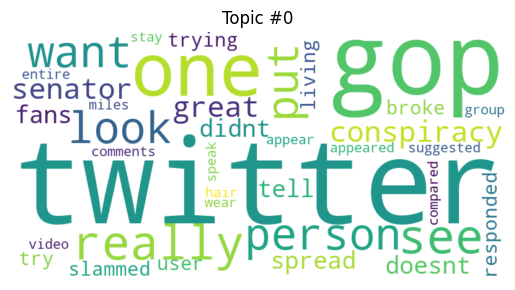

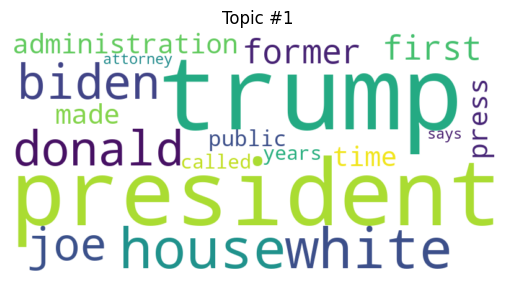

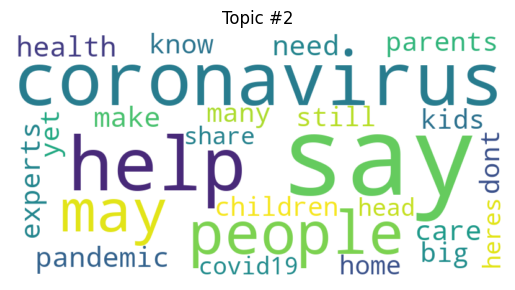

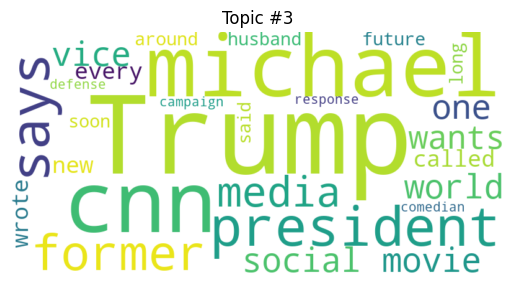

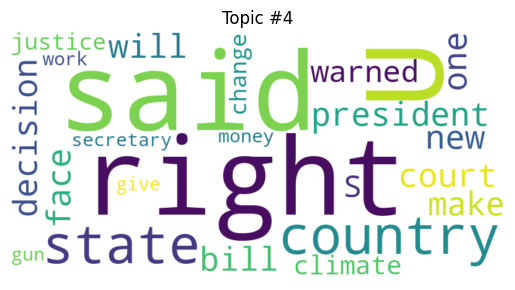

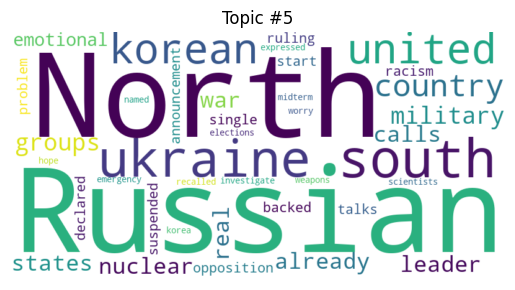

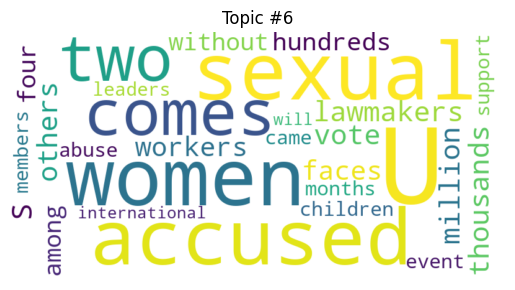

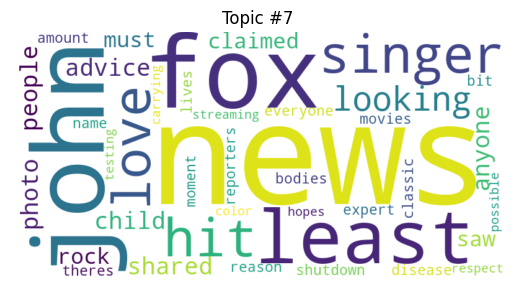

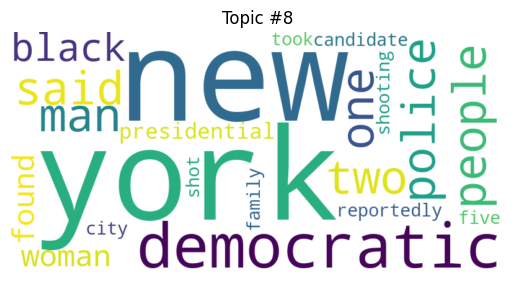

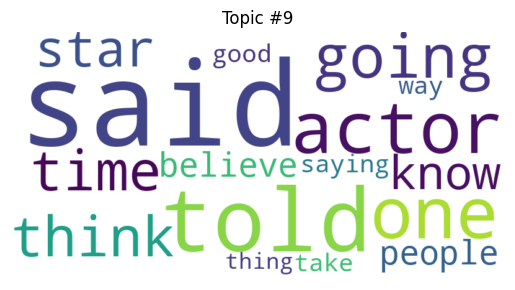

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a list of topics and their top 20 words
topic_words = []
for i, topic in ldamodel.show_topics(formatted=False, num_topics=10, num_words=50):
    topic_words.append([word[0] for word in topic])

# join the words into a single string for each topic
topic_strings = [' '.join(words) for words in topic_words]

# create a word cloud for each topic
for i in range(10):
    wc = WordCloud(background_color="white", max_words=50, width=800, height=400)
    wc.generate(topic_strings[i])
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic #" + str(i))
    plt.show()
